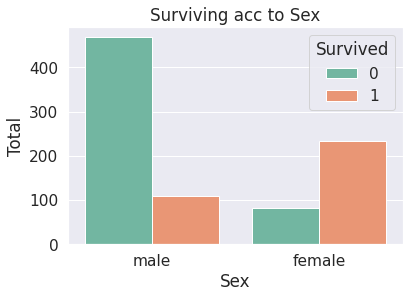

/home/omar/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


PassengerId : 0
Survived : 0
Pclass : 0
Name : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Ticket : 0
Fare : 0
Cabin : 687
Embarked : 2
S    644
C    168
Q     77
Name: Embarked, dtype: int64
{'Mme', 'Major', 'Jonkheer', 'Ms', 'the Countess', 'Master', 'Lady', 'Sir', 'Rev', 'Col', 'Mlle', 'Don', 'Miss', 'Dr', 'Capt', 'Mr', 'Mrs'}
Common Citizen    830
Royalty            43
Dr                  7
Rev                 6
Officer             5
Name: Titles, dtype: int64


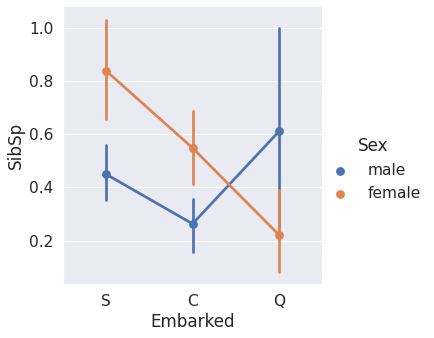

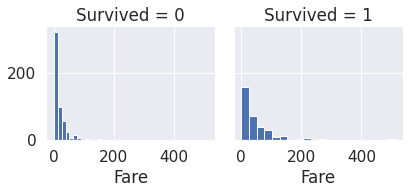

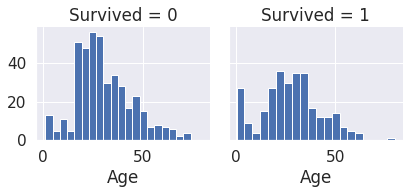

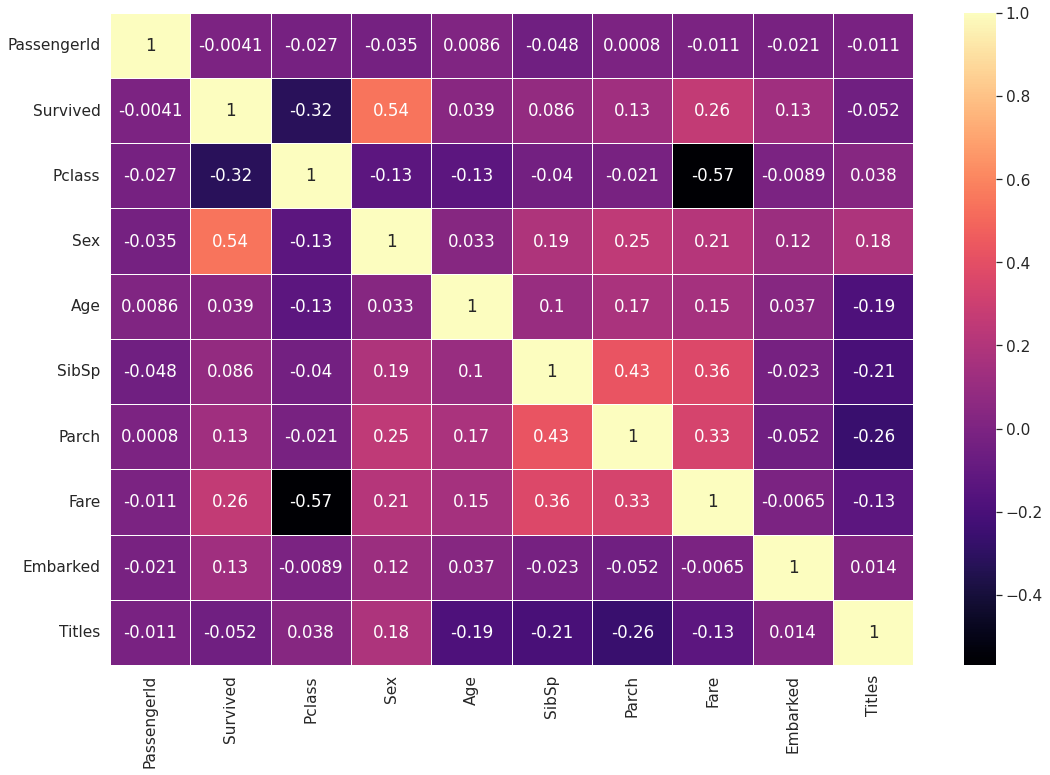

In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[104]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('train.csv')

pd.crosstab(df['Sex'],df['Age'])

ax=sns.countplot(x='Sex',hue='Survived',palette='Set2',data=df)
ax.set(title="Surviving acc to Sex",xlabel='Sex',ylabel='Total')
plt.show()

sns.factorplot(x='Embarked',y="SibSp",hue="Sex",data=df)

df.sample()

df.head()

graph=sns.FacetGrid(df,col="Survived")
graph.map(plt.hist,"Fare",bins=20)
df.loc[df["Fare"]>400,"Fare"]=df["Fare"].median()



graph_age=sns.FacetGrid(df,col="Survived")
graph_age.map(plt.hist,"Age",bins=20)
df.loc[df["Age"]< 20,"Age"]=45


for column in df:
    print(column,":",df[column].isnull().sum())

df["Age"].fillna(df["Age"].median(),inplace=True)
df["Fare"].fillna(df["Fare"].median(),inplace=True)
print(df["Embarked"].value_counts())

df["Embarked"].fillna("S", inplace=True)



df['Name'].sample(20)

def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return "Missing title"
   

titles=set([x for x in df.Name.map(lambda x : get_title(x))])
print(titles)

def shorter_titles(x):
    titles=x['Titles']
    if titles in ['Capt','Major','Col']:
        return "Officer"
    elif titles in ["Don",'Jonkheer','the Countess','Master']:
        return "Royalty"
    elif titles in ['Mrs','Lady','Sir','Miss','Mr', 'Ms','Mlle','Mme']:
        return "Common Citizen"
    else:
        return titles
 
df["Titles"]=df.Name.map(lambda x : get_title(x))
df["Titles"]=df.apply(shorter_titles,axis=1)

print(df.Titles.value_counts())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna("S", inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("Cabin", axis=1, inplace=True)
df.Sex.replace(('male',"female"),(0,1),inplace=True)
df.Embarked.replace(('S',"C","Q"),(0,1,2),inplace=True)
df.Titles.replace(('Officer',"Royalty","Dr","Rev","Common Citizen",),(0,1,2,3,4),inplace=True)

df.Embarked.value_counts()
df.Titles.value_counts()
df.sample(20)
df.isnull().sum

#display graphs
train_corr = df.corr(method='kendall')
plt.figure(figsize=(18, 12))
sns.set(font_scale=1.4)
sns.heatmap(train_corr, 
            annot=True, 
            linecolor='white', 
            linewidth=0.5, 
            cmap='magma');





In [10]:
from sklearn import*
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [11]:

oneh = OneHotEncoder(handle_unknown="ignore")
features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Fare", "Embarked","Titles"]
oneh.fit(df[features])
X = pd.get_dummies(df[features])# independant features 
y=df['Survived'] # dependant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)



In [12]:
randomforest=RandomForestClassifier()
randomforest.fit(X_train,y_train)
y_pred=randomforest.predict(X_test)
randomforest.score(X_train, y_train)
acc_randomforest=round(accuracy_score(y_pred,y_test)*100, 2)
print('Accuracy predictor : {}'.format(acc_randomforest))

pickle.dump(randomforest,open('titanic_model.sav','wb'))

Accuracy predictor : 78.89


In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Titles
0,1,0,3,0,22.0,1,0,7.2500,0,4
1,2,1,1,1,38.0,1,0,71.2833,1,4
2,3,1,3,1,26.0,0,0,7.9250,0,4
3,4,1,1,1,35.0,1,0,53.1000,0,4
4,5,0,3,0,35.0,0,0,8.0500,0,4


In [14]:

X_test = oneh.transform(df[features])
X_test = pd.get_dummies(df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [15]:
#correct oreder in dataframe
import pickle

def prediction_model(pclass,sex, age, sibSp, parch, fare, embarked, title):
    x=[[pclass,sex, age, sibSp, parch, fare, embarked, title]]
    randomforest=pickle.load(open('titanic_model.sav','rb'))
    predictions=randomforest.predict(x)
    print(predictions)


In [16]:
prediction_model(1,1,11,1,1,19,1,1)

[1]


/home/omar/.local/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
